In [257]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
import pandas as pd
import io #Used as buffer

In [258]:
path= Path(f'../../data/cluster_results')

In [259]:
def read_csv(f):
    df = pd.read_csv(f).mean()
    df['std'] = pd.read_csv(f).std().iloc[0] #remove this line to remove std from table

    df['experiment'] = f.parent.parent.parent.name
    df['function'] = f.parent.parent.name
    name = f.parent.name
    df['freq'] = int(name[4:].split('n')[0])
    #df['method'] = f.name.split('_')[0]
    if 'noNN' in f.name:
        df['method'] = f.name.split('_')[0]       
    else:
        df['method'] = f.name.split('_')[0]+'_'+f.name.split('_')[1]
    df['ns']=int(name[19:].split('n')[0])
    df['tw']=name[25:].split('nn')[0] 
    if df['tw']=='None':
       # df['bs']=int(name[34:].split('n')[0])
        df['epochs']=int(name[43:]) 
    else:
       # df['bs']=int(name[31:].split('n')[0])
        df['epochs']=int(name[40:][0])
    return df

measure_name=['mof','sr','arr','nfe','nn_time']
index_measure=0

In [303]:
m = measure_name[index_measure]

files = list(f for f in path.glob(f'exp*/*/freq1*nn_s*nn_tw*bs*/*{m}.csv') if 'NNnorm_Random' in f.name) #path.glob(f'exp*/*/freq1*nn_s*nn_tw*bs*/*{m}.csv')
files=[o for o in files if 'nn_s5' not in o.parent.name]
files=[o for o in files if 'nn_s2' not in o.parent.name]
df = pd.DataFrame([read_csv(f) for f in files])
# data = pd.pivot_table(df, index=['experiment','function'], columns='method', values=m) #,'freq' later for adding frequency experiment
data = pd.pivot_table(df, index=['experiment','function','freq','ns', 'tw','epochs'],columns='method' ) #,'tw', 'bs','epochs'
data.style.format("{:,.2f}")

In [304]:
final_data = data[m].copy()

for col in data[m].columns:
    final_data[col] = data[m][col].apply(lambda x: f'{x:,.2f} (±') + data['std'][col].apply(lambda x: f'{x:,.2f})')
final_data    

method                                                     NNnorm_Random
experiment function   freq ns tw   epochs                               
exp1       rastrigin  1    1  None 10                      19.48 (±3.33)
                           3  5    3                       15.98 (±5.18)
                           7  5    3                       19.57 (±6.04)
                           9  5    3                       21.07 (±5.39)
           rosenbrock 1    1  None 10              27,894.42 (±3,232.93)
                           3  5    3              87,687.60 (±95,040.72)
                           7  5    3            182,569.97 (±125,896.82)
                           9  5    3            170,070.91 (±129,061.54)
           sphere     1    1  None 10                       7.92 (±0.80)
                           3  5    3                        6.93 (±5.99)
                           7  5    3                        8.46 (±5.44)
                           9  5    3                        9.35 (±5.49)
exp2       rastrigin  1    1  None 10                       2.18 (±0.25)
                           3  5    3                        2.10 (±0.27)
                           7  5    3                        2.13 (±0.22)
                           9  5    3                        2.15 (±0.24)
           rosenbrock 1    1  None 10                     93.84 (±69.27)
                           3  5    3                       66.25 (±9.67)
                           7  5    3                       66.06 (±7.38)
                           9  5    3                       66.77 (±8.86)
           sphere     1    1  None 10                       0.20 (±0.03)
                           3  5    3                        0.09 (±0.01)
                           7  5    3                        0.10 (±0.01)
                           9  5    3                        0.09 (±0.00)
exp3       rastrigin  1    1  None 10                      12.42 (±3.20)
                           3  5    3                       14.18 (±3.40)
                           7  5    3                       12.85 (±3.06)
                           9  5    3                       14.89 (±3.37)
           rosenbrock 1    1  None 10                 2,859.88 (±881.91)
                           3  5    3                3,009.50 (±1,108.59)
                           7  5    3                  3,587.78 (±909.85)
                           9  5    3                  3,351.84 (±962.89)
           sphere     1    1  None 10                       4.61 (±0.15)
                           3  5    3                        4.53 (±0.97)
                           7  5    3                        4.96 (±0.17)
                           9  5    3                        4.77 (±0.80)
exp4       rastrigin  1    1  None 10                      81.22 (±6.01)
                           3  5    3                       59.53 (±5.36)
                           7  5    3                       59.20 (±5.45)
                           9  5    3                       58.30 (±5.83)
           rosenbrock 1    1  None 10      15,276,813.02 (±2,108,206.20)
                           3  5    3        9,718,677.44 (±1,846,749.73)
                           7  5    3        9,280,751.49 (±1,847,550.78)
                           9  5    3        9,829,100.28 (±2,061,727.97)
           sphere     1    1  None 10                      54.89 (±4.89)
                           3  5    3                       41.86 (±4.10)
                           7  5    3                       43.88 (±3.37)
                           9  5    3                       42.18 (±3.86)

In [305]:
print(final_data.to_csv(float_format='%.2f'))

experiment,function,freq,ns,tw,epochs,NNnorm_Random
exp1,rastrigin,1,1,None,10,19.48 (±3.33)
exp1,rastrigin,1,3,5,3,15.98 (±5.18)
exp1,rastrigin,1,7,5,3,19.57 (±6.04)
exp1,rastrigin,1,9,5,3,21.07 (±5.39)
exp1,rosenbrock,1,1,None,10,"27,894.42 (±3,232.93)"
exp1,rosenbrock,1,3,5,3,"87,687.60 (±95,040.72)"
exp1,rosenbrock,1,7,5,3,"182,569.97 (±125,896.82)"
exp1,rosenbrock,1,9,5,3,"170,070.91 (±129,061.54)"
exp1,sphere,1,1,None,10,7.92 (±0.80)
exp1,sphere,1,3,5,3,6.93 (±5.99)
exp1,sphere,1,7,5,3,8.46 (±5.44)
exp1,sphere,1,9,5,3,9.35 (±5.49)
exp2,rastrigin,1,1,None,10,2.18 (±0.25)
exp2,rastrigin,1,3,5,3,2.10 (±0.27)
exp2,rastrigin,1,7,5,3,2.13 (±0.22)
exp2,rastrigin,1,9,5,3,2.15 (±0.24)
exp2,rosenbrock,1,1,None,10,93.84 (±69.27)
exp2,rosenbrock,1,3,5,3,66.25 (±9.67)
exp2,rosenbrock,1,7,5,3,66.06 (±7.38)
exp2,rosenbrock,1,9,5,3,66.77 (±8.86)
exp2,sphere,1,1,None,10,0.20 (±0.03)
exp2,sphere,1,3,5,3,0.09 (±0.01)
exp2,sphere,1,7,5,3,0.10 (±0.01)
exp2,sphere,1,9,5,3,0.09 (±0.00)
exp3,rastrigin,1

In [306]:
##Interactive Plots

In [307]:
import altair as alt
alt.renderers.enable('notebook')
# DataFrame we use for plots
d = data.reset_index()
d.columns = ['experiment', 'function', 'freq', 'ns' , 'tw','epochs', 'NNnorm', 'NNnorm_std']
d.head(2)
d1 = d.melt(['experiment','function','freq','ns'], value_vars=['NNnorm'],
            var_name='method', value_name='mof')
d2 = d.melt(['experiment','function','freq', 'ns'], value_vars=['NNnorm_std'],
            var_name='method', value_name='mof_std')
d2.method = d2.method.str.replace('_std', '')
d = d1.merge(d2)
d.head()

,experiment,function,freq,ns,method,mof,mof_std
0,exp1,rastrigin,1,1,NNnorm,19.480260,3.328311
1,exp1,rastrigin,1,3,NNnorm,15.983925,5.181648
2,exp1,rastrigin,1,7,NNnorm,19.565241,6.039851
3,exp1,rastrigin,1,9,NNnorm,21.071933,5.388256
4,exp1,rosenbrock,1,1,NNnorm,27894.422430,3232.926588


In [308]:
test = d.query("experiment=='exp1'").copy()  # & freq==1"
mins = test.groupby('function')['mof'].min()
test['mof_norm'] = test['mof']
for k,v in mins.iteritems():
    test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
#test.head()

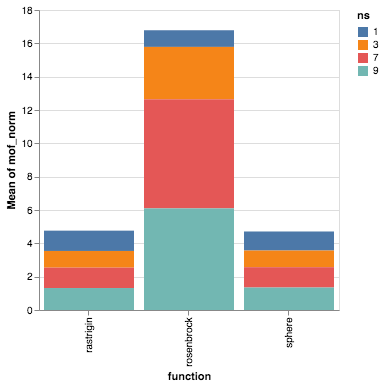

In [309]:
base = alt.Chart(test)
selector1 = alt.selection_single(fields=['function'])
# Q -> quantity, numeric value
# O -> ordinal, category valeus in order
# N -> nominal, category
chart1 = base.mark_bar().encode(
    alt.X('function'),
    alt.Y('mean(mof_norm)'),
    alt.Color('ns:N'),
    opacity = alt.condition(selector1, alt.OpacityValue(1.0), alt.OpacityValue(0.1))
).properties(
    width=300
).add_selection(selector1)


chart1

In [310]:
def plot_experiment(exp):
    test = d.query(f"experiment=={exp!r}").copy()  # & freq==1"
    mins = test.groupby('function')['mof'].min()
    test['mof_norm'] = test['mof']
    for k,v in mins.iteritems():
        test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
    #test.head()

    base = alt.Chart(test)
    chart1 = base.mark_bar().encode(
        alt.X('function'),
        alt.Y('mean(mof_norm)'),#_norm
        alt.Color('ns:N'),
        alt.Tooltip(['mof_norm','mof','freq','function']),
    ).properties(
        title=exp,
        width=300
    )
    return chart1

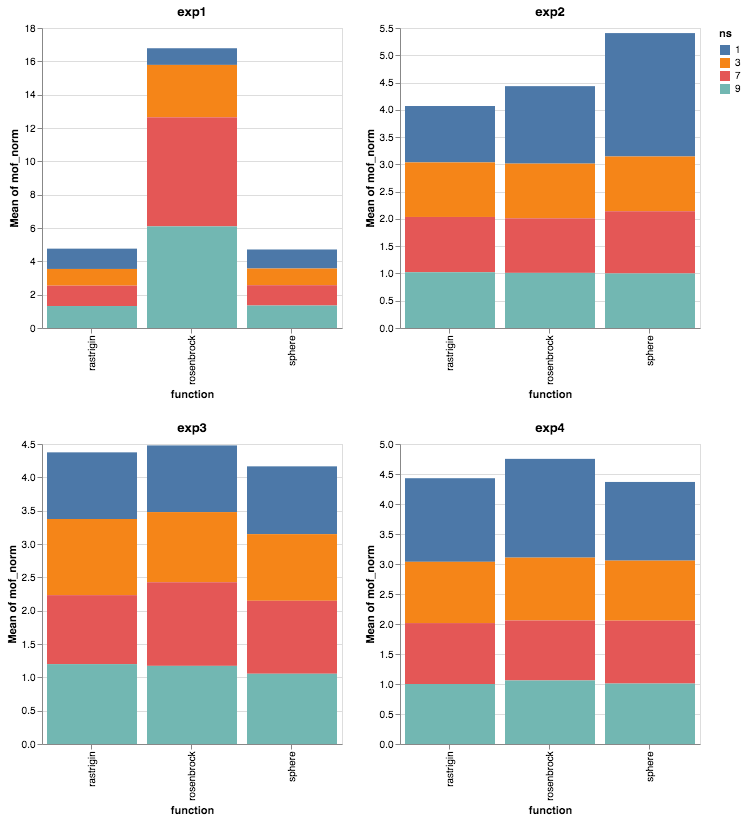

In [311]:
(plot_experiment('exp1')|plot_experiment('exp2'))&(plot_experiment('exp3')|plot_experiment('exp4'))

In [312]:
def plot2_experiment(exp):
    test = d.query(f"experiment=={exp!r}").copy()  # & freq==1"
    mins = test.groupby('function')['mof'].min()
    test['mof_norm'] = test['mof']
    for k,v in mins.iteritems():
        test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
    #test.head()

    base = alt.Chart(test)
    chart1 = base.mark_bar().encode(
        alt.X('ns:O', title='', axis=None),
        alt.Y('mean(mof_norm)', title=f'{exp} (mof_norm)'), #mof_norm
        alt.Color('ns:N', legend=alt.Legend(title='Sample size')),
        alt.Column('function', title=''),
        alt.Tooltip(['mof_norm','mof','freq','function']),
    ).properties(
#         title=exp,
        width=40, height=100
    )
    return chart1

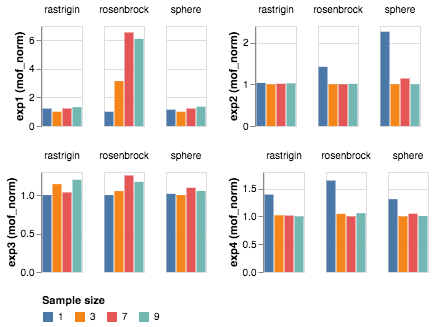

In [313]:
samplesize=(plot2_experiment('exp1')|plot2_experiment('exp2'))&(plot2_experiment('exp3')|plot2_experiment('exp4'))

samplesize = samplesize.configure_legend(
    orient='bottom'
)
samplesize

In [314]:
samplesize.save(str(path/'samplesize.png'), scale_factor=2.0)

In [315]:
def plot3_experiment(exp):
    test = d.query(f"experiment=={exp!r}").copy()  # & freq==1"
    mins = test.groupby('function')['mof'].min()
    test['mof_norm'] = test['mof']
    for k,v in mins.iteritems():
        test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
    #test.head()
    base = alt.Chart(test)
    chart1 = base.mark_bar().encode(
        alt.X('ns:O', title='', axis=None),
        alt.Y('mean(mof_norm)', title='mof_norm'),
        alt.Color('ns:N',  legend=alt.Legend(title='Sample size')),
        alt.Tooltip(['mean(mof_norm)','freq']),
    ).properties(
        title=exp,
        width=70, height=100
    )
    return chart1

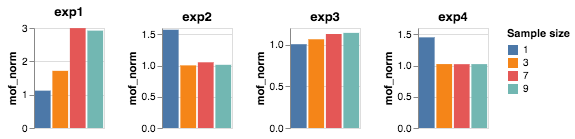

In [316]:
samplesize=(plot3_experiment('exp1')|plot3_experiment('exp2'))|(plot3_experiment('exp3')|plot3_experiment('exp4'))
samplesize